In [1]:
## Random Forest Code from lab (dsc-tree-ensembles-random-forests-lab)

In [2]:
import sklearn

In [3]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [4]:
##Uploading the datasets
df_training = pd.read_csv('training_clean')
df_test = pd.read_csv('test_clean')

In [5]:
ls_drop = ['addr_state_IA', 'home_ownership_OTHER', 'purpose_educational']
df_training = df_training.drop('Unnamed: 0', 1)
df_training = df_training.drop(ls_drop, 1)

In [6]:
df_test = df_test.drop('Unnamed: 0', 1)

In [7]:
df_random_forest_train = df_training.drop('loan_status_current', 1)
loan_status_current_train = df_training['loan_status_current']

In [8]:
df_random_forest_test = df_test.drop('loan_status_current', 1)
loan_status_current_test = df_test['loan_status_current']

In [9]:
# Modeling

In [10]:
tree_clf = DecisionTreeClassifier(class_weight = 'balanced', criterion='gini', max_depth=5) 
tree_clf.fit(df_random_forest_train, loan_status_current_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

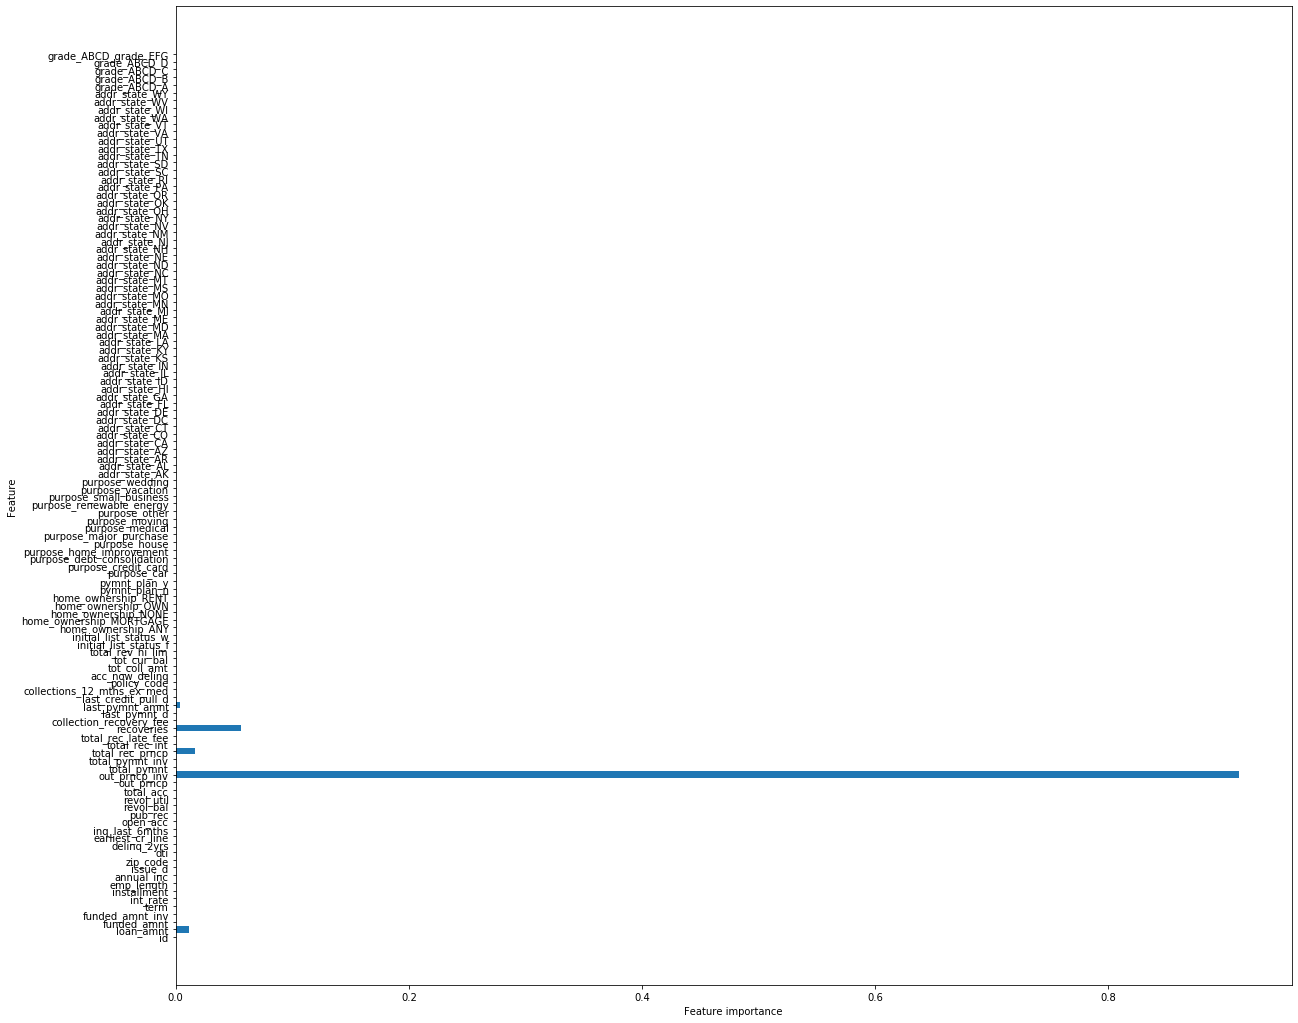

In [11]:
def plot_feature_importances(model):
    n_features = df_random_forest_train.shape[1]
    plt.figure(figsize=(20,18))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_random_forest_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [12]:
# Test set predictions
pred = tree_clf.predict(df_random_forest_test)

# Confusion matrix and classification report
print(confusion_matrix(loan_status_current_test, pred))
print(classification_report(loan_status_current_test, pred))

[[618615   9987]
 [     0 130718]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    628602
           1       0.93      1.00      0.96    130718

    accuracy                           0.99    759320
   macro avg       0.96      0.99      0.98    759320
weighted avg       0.99      0.99      0.99    759320



In [13]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(loan_status_current_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 98.68%


In [14]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [15]:
bagged_tree.fit(df_random_forest_train, loan_status_current_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [16]:
bagged_tree.score(df_random_forest_train, loan_status_current_train)

0.9963257358294024

In [17]:
# Test accuracy score
bagged_tree.score(df_random_forest_test, loan_status_current_test)

0.9977348153611125

In [18]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(df_random_forest_train, loan_status_current_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Training accuracy score
forest.score(df_random_forest_train, loan_status_current_train)

0.9961150338247741

In [20]:
# Test accuracy score
forest.score(df_random_forest_test, loan_status_current_test)

0.9961070431438656

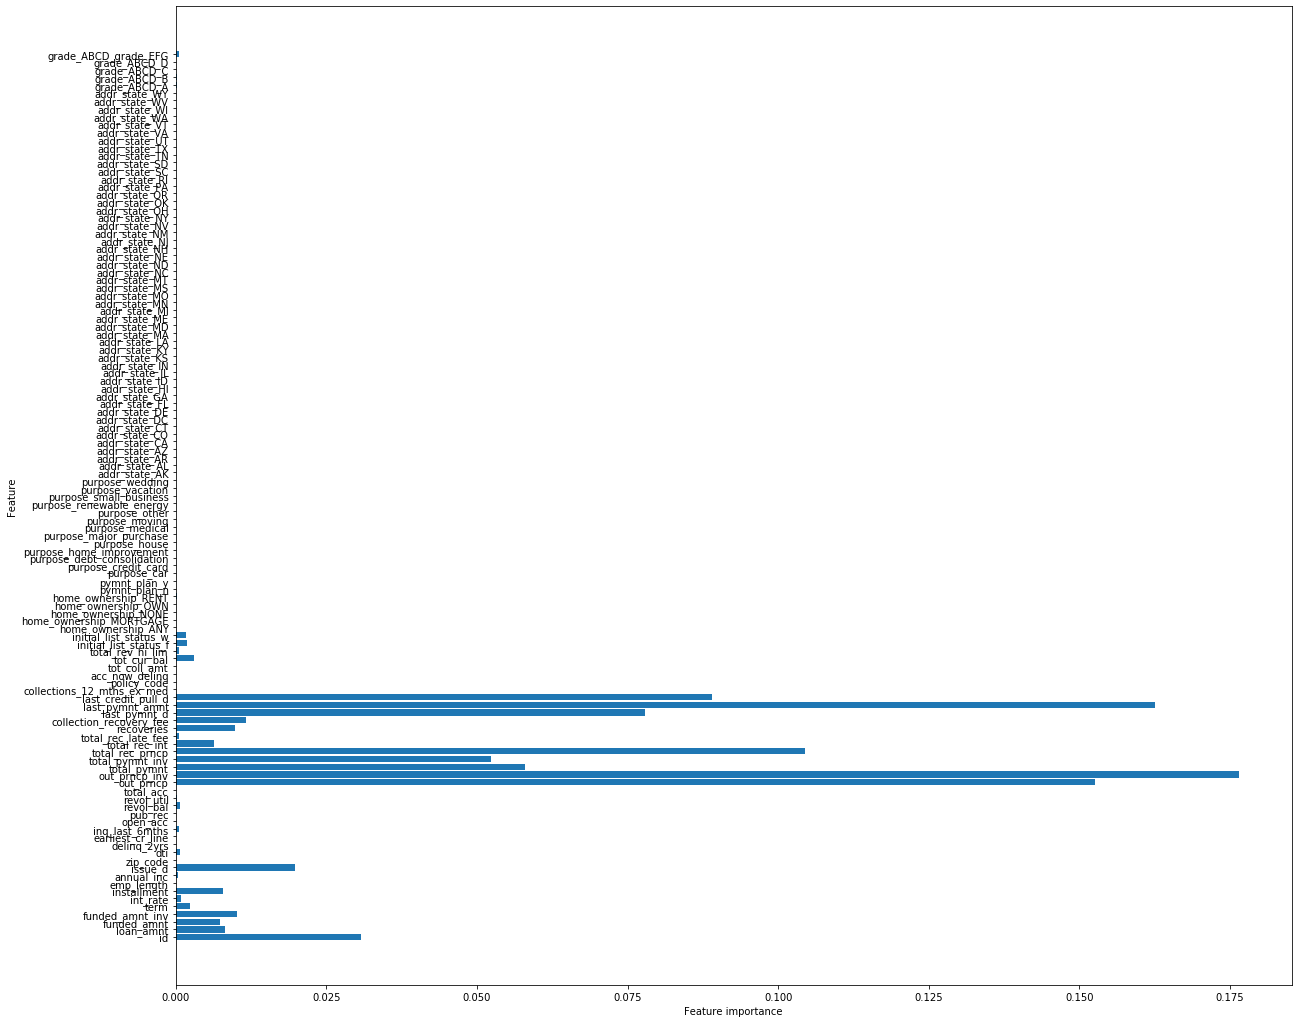

In [21]:
plot_feature_importances(forest)

In [ ]:
#Grid Search found the following optimal parameters: 
#criterion: 'entropy'
#max_depth: 6
#min_samples_leaf: 10
#min_samples_split: 5

In [ ]:
# Instantiate and fit a RandomForestClassifier 
#forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
#forest_2.fit(df_random_forest_train, loan_status_current_train)

In [22]:
# Instantiate and fit a RandomForestClassifier (with Grid Search parameters)
forest_2 = RandomForestClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 10, min_samples_split = 5)
forest_2.fit(df_random_forest_train, loan_status_current_train)

/Users/alextyryshkin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

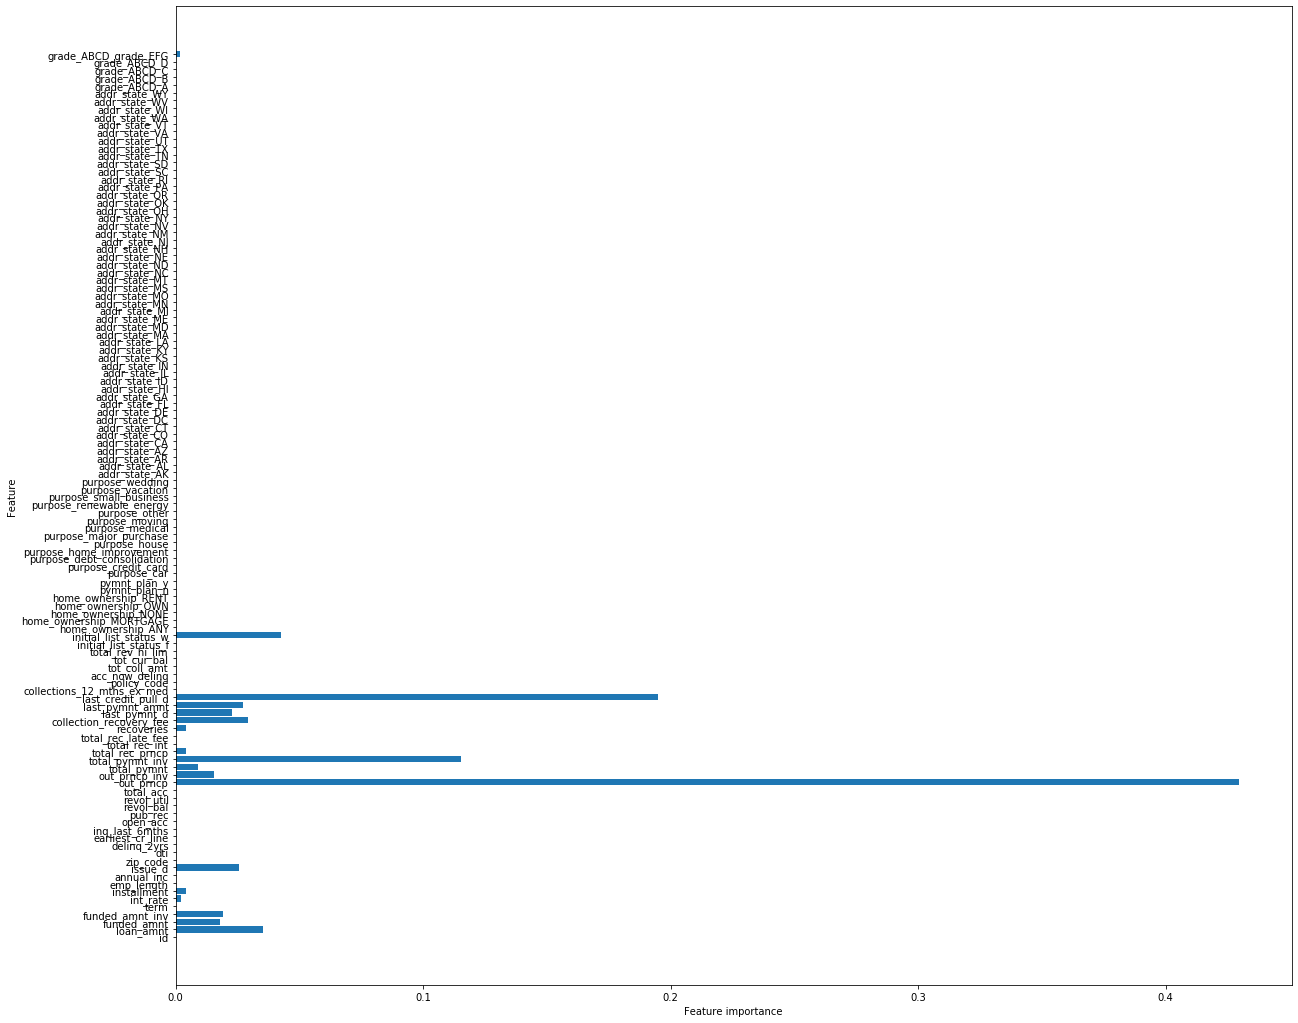

In [24]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [25]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

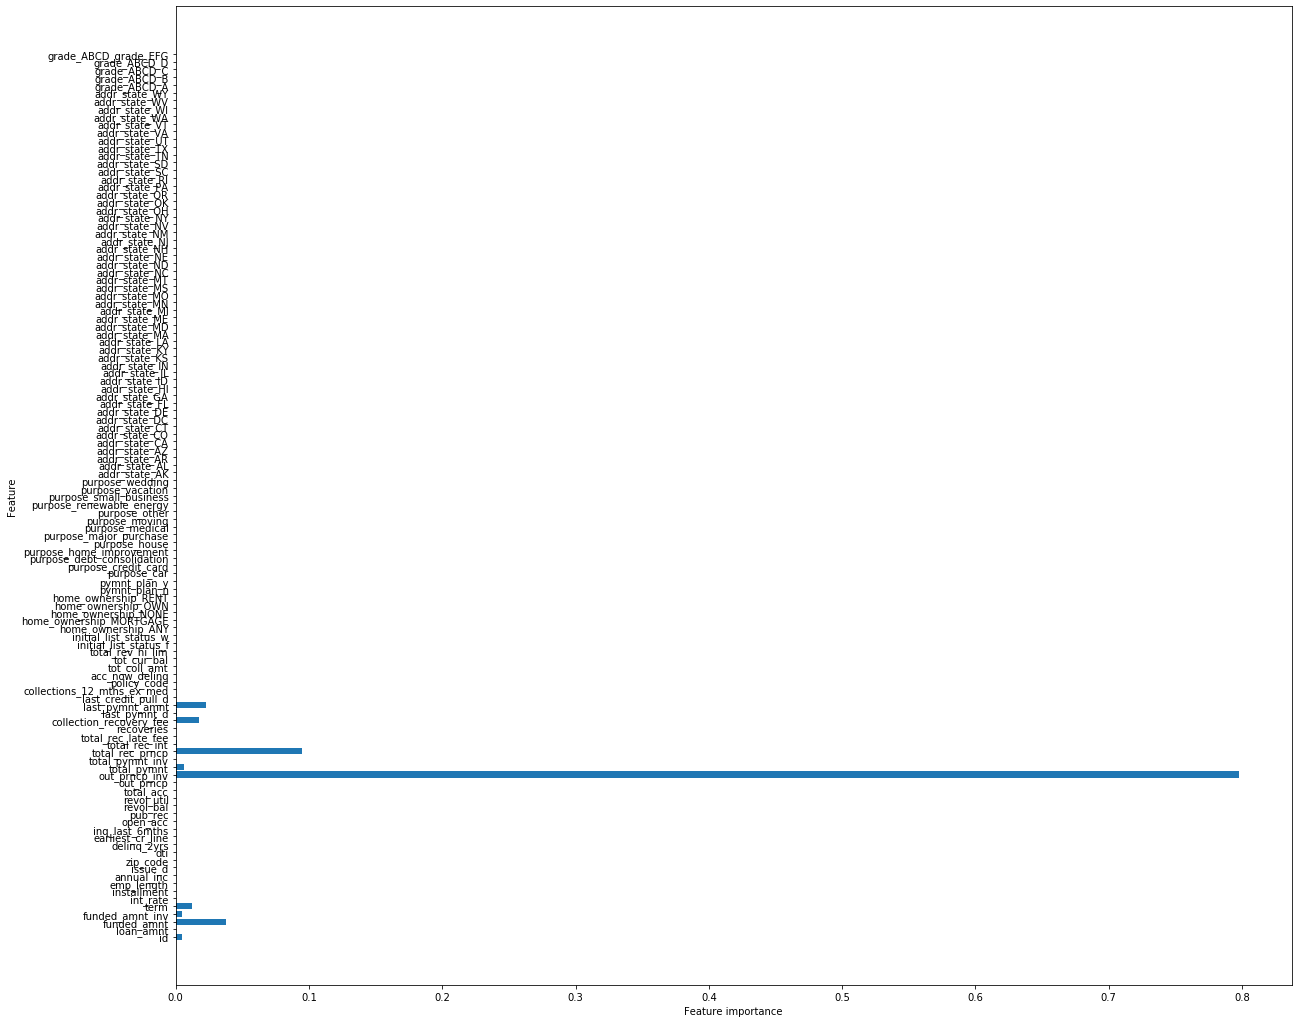

In [26]:
# Feature importance
plot_feature_importances(rf_tree_2)

In [27]:
sklearn.metrics.classification_report(loan_status_current_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99    628602\n           1       0.93      1.00      0.96    130718\n\n    accuracy                           0.99    759320\n   macro avg       0.96      0.99      0.98    759320\nweighted avg       0.99      0.99      0.99    759320\n'

In [ ]:
## Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5, 7, 8, 10]
}

In [30]:
grid_clf = GridSearchCV(forest_2, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(df_random_forest_train, loan_status_current_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(df_random_forest_train)
val_preds = grid_clf.predict(df_random_forest_test)
training_accuracy = accuracy_score(loan_status_current_train, training_preds)
val_accuracy = accuracy_score(loan_status_current_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

/Users/alextyryshkin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
criterion: 'gini'
max_depth: 8
min_samples_leaf: 8
min_samples_split: 10

Training Accuracy: 99.61%
Validation accuracy: 99.38%


In [31]:
sklearn.metrics.classification_report(loan_status_current_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99    628602\n           1       0.93      1.00      0.96    130718\n\n    accuracy                           0.99    759320\n   macro avg       0.96      0.99      0.98    759320\nweighted avg       0.99      0.99      0.99    759320\n'

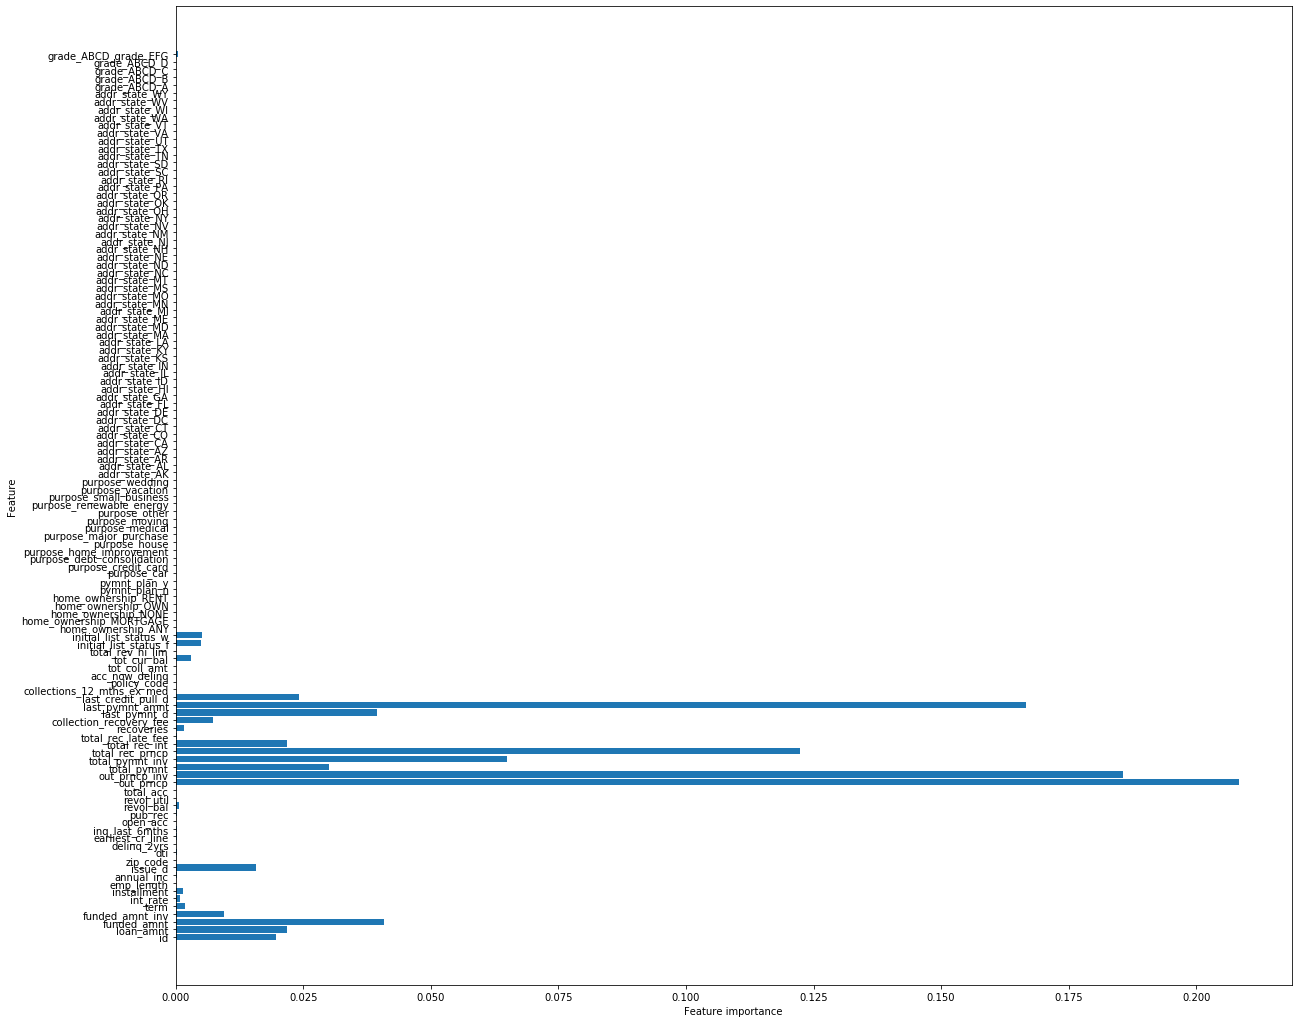

In [32]:
plot_feature_importances(forest_2)

In [33]:
# Test set predictions
pred = forest_2.predict(df_random_forest_test)

# Confusion matrix and classification report
print(confusion_matrix(loan_status_current_test, pred))
print(classification_report(loan_status_current_test, pred))

[[627327   1275]
 [  1341 129377]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628602
           1       0.99      0.99      0.99    130718

    accuracy                           1.00    759320
   macro avg       0.99      0.99      0.99    759320
weighted avg       1.00      1.00      1.00    759320

